In [1]:
import pandas as pd
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
#load the nx graph object, stored in a pickle file
G = nx.read_gpickle("who_follows_who_new2.pickle")

In [3]:
#inspect graph object
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 78
Number of edges: 1223
Average in degree:  15.6795
Average out degree:  15.6795


## In Degree vs Out Degree Distribution 

In [4]:
in_deg_iter = G.in_degree()
in_deg=[v for k, v in in_deg_iter]

out_deg_iter = G.out_degree()
out_deg=[v for k, v in out_deg_iter]

deg_iter = G.degree()
deg=[v for k, v in deg_iter]

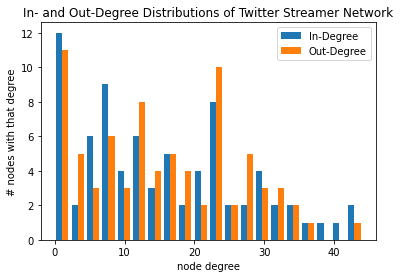

In [5]:
plt.title("In- and Out-Degree Distributions of Twitter Streamer Network")
plt.hist([in_deg,out_deg], bins=20, label=["In-Degree" , "Out-Degree"])
plt.xlabel("node degree")
plt.ylabel("# nodes with that degree")
plt.legend(loc='upper right')
plt.show()

No handles with labels found to put in legend.


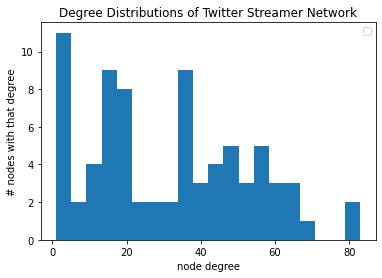

In [6]:
plt.title("Degree Distributions of Twitter Streamer Network")
plt.hist([deg], bins=20,)
plt.xlabel("node degree")
plt.ylabel("# nodes with that degree")
plt.legend(loc='upper right')
plt.show()

In [7]:
deg_df = pd.DataFrame()
deg_df["in-degree"] = in_deg
deg_df["out-degree"] = out_deg

In [8]:
deg_df.describe()


,in-degree,out-degree
count,78.000000,78.000000
mean,15.679487,15.679487
std,11.418251,10.622805
min,0.000000,0.000000
25%,6.250000,7.000000
50%,13.500000,15.000000
75%,23.000000,23.750000
max,44.000000,43.000000


'''
Average in and out degree are identical, although their distribution slightly distinct.
'''

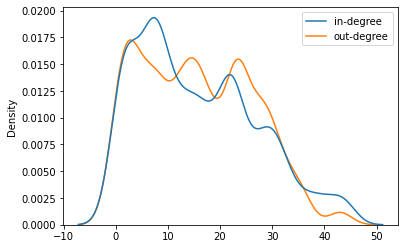

In [9]:
sns.kdeplot(data=deg_df, bw_adjust=.5)
plt.savefig("in_out_deg_distr.png", dpi=300, bbox_inches='tight')

## In Degree vs Out Degree Distribution Conclusions

- between the highest degrees (>40 incoming/outgoing edges), there are more Streamers with high incoming links then outcoming

- when the degree is smaller (<10), there are more Streamers having a small in-degree

- on the average region, we have out-degrees dominate the distribution

-> a lot of streamers have a lower in-degree!


In [10]:
print(np.mean(in_deg))
print(np.mean(out_deg))

15.679487179487179
15.679487179487179


"Taking distances from or to all other nodes is irrelevant in undirected graphs, whereas it can produce totally different results in directed graphs (e.g. a website can have a high closeness centrality from outgoing link, but low closeness centrality from incoming links)." Wiki Closeness Centrality

Let#s check how they behave in our network!

## In-Closeness vs Out-Closeness

In [11]:
cc_df=pd.DataFrame()

In [12]:
cc_df["in-cc"]=nx.closeness_centrality(G).values()


G_copy=G.copy()

cc_df["out-cc"]=nx.closeness_centrality(G_copy.reverse()).values()


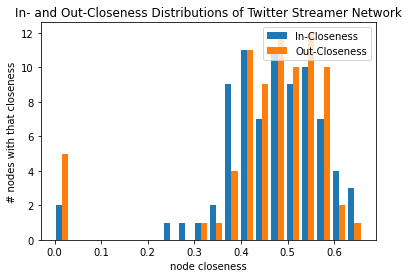

In [14]:
plt.title("In- and Out-Closeness Distributions of Twitter Streamer Network")
plt.hist(cc_df, bins=20, label=["In-Closeness" , "Out-Closeness"])
plt.xlabel("node closeness")
plt.ylabel("# nodes with that closeness")
plt.legend(loc='upper right')
plt.show()

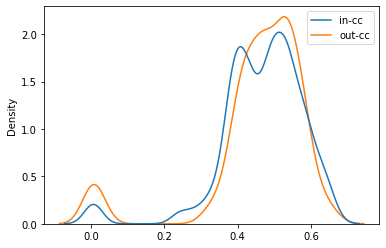

In [15]:
sns.kdeplot(data=cc_df, 
           bw_adjust=.5
           )
plt.savefig("in_out_cc_distr.png", dpi=300, bbox_inches='tight')

In [13]:
cc_df.describe()


,in-cc,out-cc
count,78.000000,78.000000
mean,0.467334,0.459758
std,0.115084,0.137483
min,0.000000,0.000000
25%,0.406185,0.424721
50%,0.486105,0.480605
75%,0.541855,0.540131
max,0.660046,0.658126


## Closeness Conclusion

There are no unexpected distribution between incoming and outgoing edges.
The degrees and closeness correlation between incoming and outgoing edges,
and are mostly similiar: a streamer has the same amount of incoming and outgoing edges, as well as the same avg path lengths over in- and out-edges.

## Final Conclusions

in-closeness and out-closeness is on avg very similar, albeit the inward closeness is slightly higher.
this is due to some periphery nodes with only incoming edges 
